In [1]:
import numpy as np
import pandas as pd
from dateutil import parser
from datetime import datetime, timedelta

In [2]:
sav2013_2017 = pd.read_csv('./data/sav2013-2017-raw.csv', delimiter=';')

In [3]:
sav2013_2017.head()

,hour,sessions
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

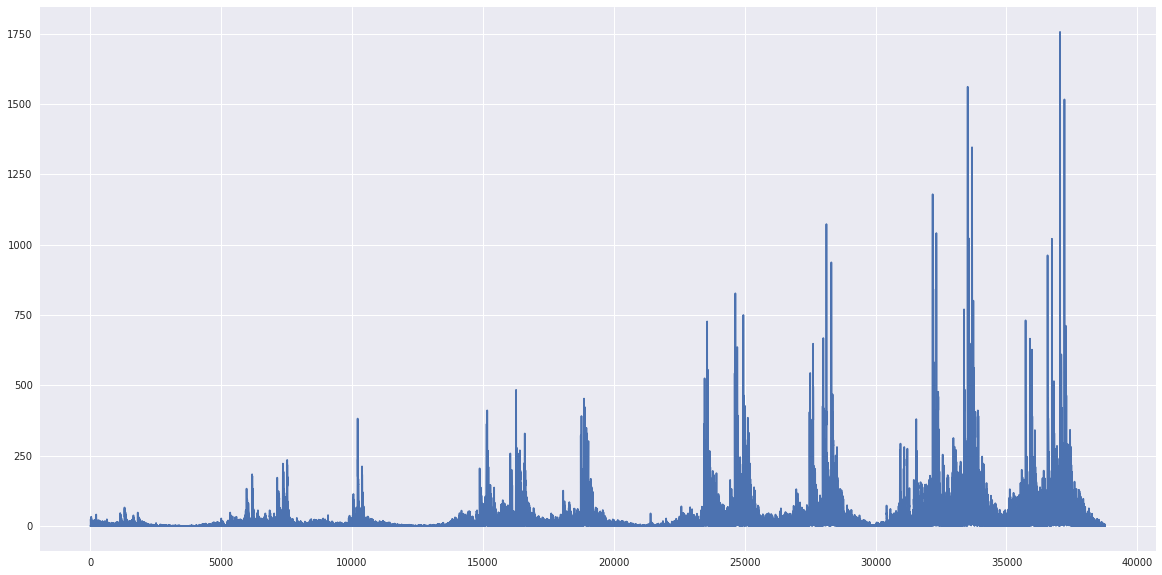

In [5]:
plt.figure(figsize=(20,10))
plt.plot(sav2013_2017.hour, sav2013_2017.sessions)
plt.show()

In [14]:
def get_sav_data(init_date, dataframe):
    data, count, av_factor, hour, weekday = [], [], [], [], []
    
    entregas_provas = [parser.parse('2013-04-19 23:59:59.000'),
                       parser.parse('2013-06-24 23:59:59.000'),
                       parser.parse('2013-09-23 23:59:59.000'),
                       parser.parse('2014-04-14 23:59:59.000'),
                       parser.parse('2014-06-09 23:59:59.000'),
                       parser.parse('2014-09-29 23:59:59.000'),
                       parser.parse('2015-04-20 23:59:59.000'),
                       parser.parse('2015-06-22 23:59:59.000'),
                       parser.parse('2015-09-28 23:59:59.000'),
                       parser.parse('2016-04-08 23:59:59.000'),
                       parser.parse('2016-05-27 23:59:59.000'),
                       parser.parse('2016-09-23 23:59:59.000'),
                       parser.parse('2016-10-14 23:59:59.000'),
                       parser.parse('2017-04-07 17:06:53.233'),
                       parser.parse('2017-06-02 23:48:14.300'),
                       parser.parse('2017-09-06 20:20:32.017'),
                       parser.parse('2017-10-11 19:42:29.193'),
                       parser.parse('2017-10-11 19:42:45.233')]    

    datas_enem_nac = [parser.parse('2013-10-26 00:00:00.000'),
                      parser.parse('2013-10-27 00:00:00.000'),
                      parser.parse('2014-11-08 00:00:00.000'),
                      parser.parse('2014-11-09 00:00:00.000'),
                      parser.parse('2015-10-24 00:00:00.000'),
                      parser.parse('2015-10-25 00:00:00.000'),
                      parser.parse('2016-11-05 00:00:00.000'),
                      parser.parse('2016-11-06 00:00:00.000'),
                      parser.parse('2017-11-05 00:00:00.000'),
                      parser.parse('2017-11-12 00:00:00.000')]
    
    cur_date = init_date
    for row in dataframe.values:
        av_weigth = 0.
        for prova_date in entregas_provas:
            if cur_date >= prova_date and cur_date <= prova_date + timedelta(days=5):
                av_weigth = 2.
            elif cur_date >= prova_date and cur_date <= prova_date + timedelta(days=15):
                av_weigth = 1.
        
        for prova_enem in datas_enem_nac:
            if np.abs((prova_enem - cur_date).days) <= 15:
                av_weigth += 4.
                break
        
        data.append(cur_date)
        count.append(row[1] * 1.0)
        av_factor.append(av_weigth)
        hour.append(cur_date.hour * 1.)
        weekday.append(cur_date.weekday() * 1.)

        cur_date += timedelta(hours=1)
    
    return pd.DataFrame({'date': data, 
                         'hits': count, 
                         'av_factor': av_factor,
                         'hour': hour,
                         'weekday': weekday})

In [15]:
init_d = parser.parse('2013-07-31 00:00:00')
data = get_sav_data(init_d, sav2013_2017)

In [16]:
data.head()

,av_factor,date,hits,hour,weekday
0,0.0,2013-07-31 00:00:00,0.0,0.0,2.0
1,0.0,2013-07-31 01:00:00,0.0,1.0,2.0
2,0.0,2013-07-31 02:00:00,0.0,2.0,2.0
3,0.0,2013-07-31 03:00:00,0.0,3.0,2.0
4,0.0,2013-07-31 04:00:00,0.0,4.0,2.0


In [17]:
data.tail()

,av_factor,date,hits,hour,weekday
38755,0.0,2017-12-31 19:00:00,3.0,19.0,6.0
38756,0.0,2017-12-31 20:00:00,2.0,20.0,6.0
38757,0.0,2017-12-31 21:00:00,1.0,21.0,6.0
38758,0.0,2017-12-31 22:00:00,0.0,22.0,6.0
38759,0.0,2017-12-31 23:00:00,0.0,23.0,6.0


In [18]:
data.set_index('date').to_csv('./data/sav_2013_2017.csv')